We have 2 major paths regarding to how to build the GP on $(r, n_1, n_2)$ where there are missing values on at some bins:

## Path 1

Sims with misisng output at $(r, n_1, n_2)$ are not used

1. One $\xi(r)$ GP per point on a  predefined $(n_1, n_2)$ grid
  - Some sims are  missing at $(n_1, n_2)$
  - We can use one GP for all $r$ bins, or use latent space
  - [ ] Need to deal with the values missing or too off at some $r$
 
2. Use spline to interpolate the posterior prediction $\xi^{GP} (n_1, n_2)$ to full $(n_1, n_2)$ range
  - The GP uncertainty should be higher at $\theta$ where we have fewer simulations. We use weights of $w= 1/\sigma_{GP}$ when interpoalting with spline. 


The largets scales are mofified by the propagator approach anyways. Let's build the emualtor for $0.2 <r < 60 Mpc/h$

## For one mass pair:

In [11]:
import numpy as np
from gal_goku import summary_stats

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
fid = 'L2'
xi = summary_stats.Xi(data_dir, fid=fid, logging_level='ERROR')
# Only 0.2 < r < 60 mpc/h
mask_r = (xi.rbins >= 1) & (xi.rbins <= 60)
for mass_pair in xi.mass_pairs:
    rbins, xi_r =  xi.get_xi_r(mass_pair=mass_pair)
    nan_mask = np.isnan(xi_r)
    print(f'{mass_pair} | sims {np.unique(np.where(nan_mask)[0]).size}')

[13. 13.] | sims 103
[13.  12.9] | sims 103
[13.  12.8] | sims 103
[13.  12.7] | sims 103
[13.  12.6] | sims 103
[13.  12.5] | sims 103
[13.  12.4] | sims 103
[13.  12.3] | sims 103
[13.  12.2] | sims 103
[13.  12.1] | sims 103
[13. 12.] | sims 103
[13.  11.9] | sims 103
[13.  11.8] | sims 103
[13.  11.7] | sims 103
[13.  11.6] | sims 103
[13.  11.5] | sims 103
[13.  11.4] | sims 103
[13.  11.3] | sims 103
[13.  11.2] | sims 103
[13.  11.1] | sims 103
[13. 11.] | sims 103
[12.9 12.9] | sims 85
[12.9 12.8] | sims 85
[12.9 12.7] | sims 85
[12.9 12.6] | sims 85
[12.9 12.5] | sims 85
[12.9 12.4] | sims 85
[12.9 12.3] | sims 85
[12.9 12.2] | sims 85
[12.9 12.1] | sims 85
[12.9 12. ] | sims 85
[12.9 11.9] | sims 85
[12.9 11.8] | sims 85
[12.9 11.7] | sims 85
[12.9 11.6] | sims 85
[12.9 11.5] | sims 85
[12.9 11.4] | sims 85
[12.9 11.3] | sims 85
[12.9 11.2] | sims 85
[12.9 11.1] | sims 85
[12.9 11. ] | sims 85
[12.8 12.8] | sims 63
[12.8 12.7] | sims 63
[12.8 12.6] | sims 63
[12.8 12.5] | sim

In [12]:
import numpy as np
from gal_goku import summary_stats

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
fid = 'L2'
xi = summary_stats.Xi(data_dir, fid=fid, narrow=True, logging_level='ERROR')
# Only 0.2 < r < 60 mpc/h
mask_r = (xi.rbins >= 1) & (xi.rbins <= 60)
for mass_pair in xi.mass_pairs:
    rbins, xi_r =  xi.get_xi_r(mass_pair=mass_pair)
    nan_mask = np.isnan(xi_r)
    print(f'{mass_pair} | sims {np.unique(np.where(nan_mask)[0]).size}')

[13. 13.] | sims 0
[13.  12.9] | sims 0
[13.  12.8] | sims 0
[13.  12.7] | sims 0
[13.  12.6] | sims 0
[13.  12.5] | sims 0
[13.  12.4] | sims 0
[13.  12.3] | sims 0
[13.  12.2] | sims 0
[13.  12.1] | sims 0
[13. 12.] | sims 0
[13.  11.9] | sims 0
[13.  11.8] | sims 0
[13.  11.7] | sims 0
[13.  11.6] | sims 0
[13.  11.5] | sims 0
[13.  11.4] | sims 0
[13.  11.3] | sims 0
[13.  11.2] | sims 0
[13.  11.1] | sims 0
[13. 11.] | sims 0
[12.9 12.9] | sims 0
[12.9 12.8] | sims 0
[12.9 12.7] | sims 0
[12.9 12.6] | sims 0
[12.9 12.5] | sims 0
[12.9 12.4] | sims 0
[12.9 12.3] | sims 0
[12.9 12.2] | sims 0
[12.9 12.1] | sims 0
[12.9 12. ] | sims 0
[12.9 11.9] | sims 0
[12.9 11.8] | sims 0
[12.9 11.7] | sims 0
[12.9 11.6] | sims 0
[12.9 11.5] | sims 0
[12.9 11.4] | sims 0
[12.9 11.3] | sims 0
[12.9 11.2] | sims 0
[12.9 11.1] | sims 0
[12.9 11. ] | sims 0
[12.8 12.8] | sims 0
[12.8 12.7] | sims 0
[12.8 12.6] | sims 0
[12.8 12.5] | sims 0
[12.8 12.4] | sims 0
[12.8 12.3] | sims 0
[12.8 12.2] | sims 

In [2]:
import numpy as np
import importlib
from gal_goku import emus_multifid
importlib.reload(emus_multifid)

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
#mass_pair = (11.4,11.4)
mass_pair = (11.8, 11.8)
emu_type = {'wide_and_narrow':False}
xi_emu = emus_multifid.XiNativeBins(data_dir, mass_pair=mass_pair, logging_level='INFO', emu_type=emu_type)
xi_emu.train(ind_train=np.delete(np.arange(21), [2,12,18]))


BaseStatEmu | 03/19/2025 12:24:02 PM | Rank 0 | INFO  |  Removed 224/340 sims from L2 and 0/21 sims from HF
BaseStatEmu | 03/19/2025 12:24:02 PM | Rank 0 | INFO  |  Removed 224/340 sims from L2 and 0/21 sims from HF
BaseStatEmu | 03/19/2025 12:24:02 PM | Rank 0 | INFO  |  Removed 224/340 sims from L2 and 0/21 sims from HF


 /home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/emus_multifid.py:417: RuntimeWarning:invalid value encountered in log10


TypeError: XiNativeBins.train() missing 1 required positional argument: 'ind_test'

Test the saved models:

2025-03-19 11:47:09.554270: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 11:47:09.557128: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 11:47:09.566659: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742402829.582598 3056243 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742402829.587374 3056243 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-19 11:47:09.603795: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

BaseStatEmu | 03/19/2025 11:47:12 AM | Rank 0 | INFO  |  Removed 55/509 sims from L2 and 0/21 sims from HF
BaseStatEmu | 03/19/2025 11:47:12 AM | Rank 0 | INFO  |  Removed 55/509 sims from L2 and 0/21 sims from HF


 /home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/emus_multifid.py:417: RuntimeWarning:invalid value encountered in log10
2025-03-19 11:47:12.368367: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


BaseStatEmu | 03/19/2025 11:47:12 AM | Rank 0 | INFO  |  Model already exists at /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/Xi_Native_emu_mpairs1.pkl. Reload the model.
BaseStatEmu | 03/19/2025 11:47:12 AM | Rank 0 | INFO  |  Model already exists at /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/Xi_Native_emu_mpairs1.pkl. Reload the model.
BaseStatEmu | 03/19/2025 11:47:17 AM | Rank 0 | INFO  |  Removed 182/382 sims from L2 and 0/21 sims from HF
BaseStatEmu | 03/19/2025 11:47:17 AM | Rank 0 | INFO  |  Removed 182/382 sims from L2 and 0/21 sims from HF
BaseStatEmu | 03/19/2025 11:47:17 AM | Rank 0 | INFO  |  Removed 182/382 sims from L2 and 0/21 sims from HF
BaseStatEmu | 03/19/2025 11:47:17 AM | Rank 0 | INFO  |  Model already exists at /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/Xi_Native_emu_mpairs2.pkl. Reload the model.
BaseStatEmu | 03/19/2025 11:47:17 AM | Rank 0 | INFO  |  Model already exists at /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/Xi_Native_emu_mpairs2.pkl. Reload

 /home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/emus_multifid.py:417: RuntimeWarning:invalid value encountered in log10


BaseStatEmu | 03/19/2025 11:47:18 AM | Rank 0 | INFO  |  Removed 224/903 sims from L2 and 0/36 sims from HF
BaseStatEmu | 03/19/2025 11:47:18 AM | Rank 0 | INFO  |  Removed 224/903 sims from L2 and 0/36 sims from HF
BaseStatEmu | 03/19/2025 11:47:18 AM | Rank 0 | INFO  |  Removed 224/903 sims from L2 and 0/36 sims from HF
BaseStatEmu | 03/19/2025 11:47:18 AM | Rank 0 | INFO  |  Removed 224/903 sims from L2 and 0/36 sims from HF


 /home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/emus_multifid.py:417: RuntimeWarning:invalid value encountered in log10


BaseStatEmu | 03/19/2025 11:47:18 AM | Rank 0 | INFO  |  Model already exists at /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/Xi_Native_emu_mpair_11.8_11.8_wide_narrow.pkl. Reload the model.
BaseStatEmu | 03/19/2025 11:47:18 AM | Rank 0 | INFO  |  Model already exists at /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/Xi_Native_emu_mpair_11.8_11.8_wide_narrow.pkl. Reload the model.
BaseStatEmu | 03/19/2025 11:47:18 AM | Rank 0 | INFO  |  Model already exists at /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/Xi_Native_emu_mpair_11.8_11.8_wide_narrow.pkl. Reload the model.
BaseStatEmu | 03/19/2025 11:47:18 AM | Rank 0 | INFO  |  Model already exists at /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/Xi_Native_emu_mpair_11.8_11.8_wide_narrow.pkl. Reload the model.


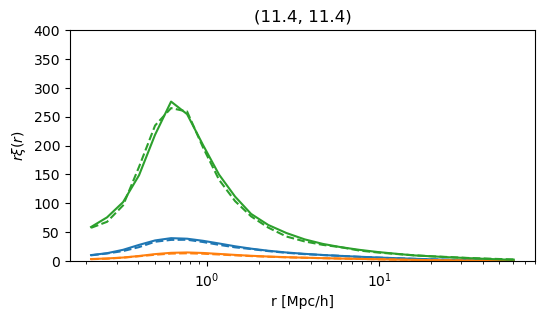

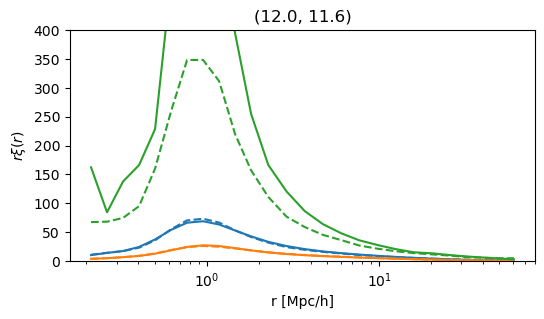

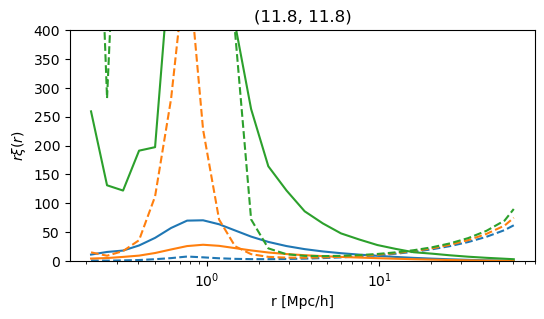

In [ ]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
from gal_goku import emus_multifid
importlib.reload(emus_multifid)

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
ind_test = np.array([2,12,18])
ind_train=np.delete(np.arange(21), ind_test)
all_mass_pairs = [(11.4,11.4), (12.0,11.6), (11.8, 11.8)]
wide_narrow = [False, False, True]
all_model_files = ['Xi_Native_emu_mpairs1.pkl', 'Xi_Native_emu_mpairs2.pkl', 'Xi_Native_emu_mpair_11.8_11.8_wide_narrow.pkl']

for i in range(len(all_mass_pairs)):
    mass_pair = all_mass_pairs[i]
    emu_type = {'wide_and_narrow':wide_narrow[i]}
    model_file = all_model_files[i]
    xi_emu = emus_multifid.XiNativeBins(data_dir, mass_pair=mass_pair, logging_level='INFO', emu_type=emu_type)
    mean, var = xi_emu.predict(ind_train=ind_train, ind_test=ind_test, model_file=model_file)
    rbins = xi_emu.mbins


    fig, ax = plt.subplots(1,1, figsize=(6,3))
    for i in range(3):
        ax.plot(rbins, rbins*10**xi_emu.Y[1][ind_test[i]], label='true', color=f'C{i}')
        ax.plot(rbins, rbins*10**mean[i], label='pred', color=f'C{i}', linestyle='--')
        ax.set_ylim(0,400)
        ax.set_xscale('log')
        ax.set_title(f'{mass_pair}')
        ax.set_xlabel('r [Mpc/h]')
        ax.set_ylabel(r'$r\xi(r)$')


In [ ]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
from gal_goku import emus_multifid
importlib.reload(emus_multifid)

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
emu_type = {'wide_and_narrow':False}


ind_test = np.array([2,12,14])
ind_train=np.delete(np.arange(15), ind_test)

mass_pair = (11.8,11.8)
model_file = 'Xi_Native_emu_mpair_11.8_11.8_only_narrow.pkl'
xi_emu = emus_multifid.XiNativeBins(data_dir, mass_pair=mass_pair, logging_level='DEBUG', emu_type=emu_type)
mean, var = xi_emu.predict(ind_train=ind_train, ind_test=ind_test, model_file=model_file)
rbins = xi_emu.mbins

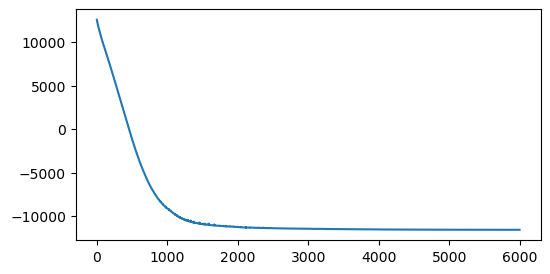

In [2]:
import pickle
loss_file = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/Xi_Native_emu_mpair_11.8_11.8_only_narrow.pkl.loss_history'
with open(loss_file, 'rb') as f:
    loss_history = pickle.load(f)

fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot(loss_history)

Text(0, 0.5, 'Loss')

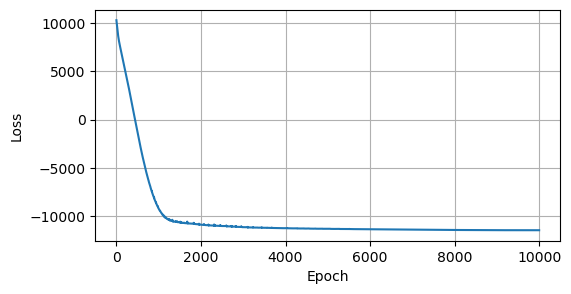

In [8]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot(xi_emu.emu.loss_history)
ax.grid()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

!!! Wide + Narrow does not train properly:

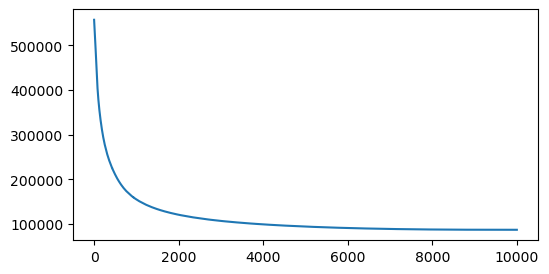

In [2]:
import pickle
loss_file = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/Xi_Native_emu_mpair_11.8_11.8_wide_narrow.pkl.loss_history'
with open(loss_file, 'rb') as f:
    loss = pickle.load(f)
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot(loss)